In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import DBSCAN, KMeans
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_sample_image, make_blobs
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier, StackingRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS
from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay, davies_bouldin_score, rand_score, roc_auc_score, roc_curve, silhouette_samples, silhouette_score 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import statsmodels.api as sm

In [4]:
df = pd.read_csv('data_dog_prepared.csv')
df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number,breuni_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,fashion_lifestyle_elite
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,fashion_lifestyle_elite
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,main_stream
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,fashion_lifestyle_elite
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,trendy


In [5]:
dogStr_df = df[['breuni_class']]
dogStr_df.head()

,breuni_class
0,fashion_lifestyle_elite
1,fashion_lifestyle_elite
2,main_stream
3,fashion_lifestyle_elite
4,trendy


In [6]:
dogNoStr_df = df.drop(columns='breuni_class')
dogNoStr_df.head()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


In [9]:
dogNoStr_df.cov()

,size_dog,eye_circularity,skull_circularity,ear_size,eyes_distance,ear_form,hair_tone,nose_elongatedness,weight_dog,muzzle_form,skin_tone_main,skin_pattern_complexity,body_length,tail_length,hair_curlness,hair_length,leg_front_number,leg_back_number
size_dog,67.806566,35.187334,102.919332,190.516742,6.038207,5.616954,222.561584,-50.729870,17.362729,80.818554,197.697297,1191.211261,156.818733,-15.580806,9.544765,11.536965,15.118261,22.391727
eye_circularity,35.187334,38.055833,77.708699,128.591531,7.251358,7.022811,176.424469,-39.934451,13.716507,86.481495,156.631730,929.355941,187.930675,2.727142,4.439758,-0.862517,-4.252816,1.759027
skull_circularity,102.919332,77.708699,248.795609,407.526682,19.985059,19.149943,476.175028,-112.489725,36.641241,177.420943,428.741769,2482.110515,362.441930,-27.175770,8.930677,37.246934,14.376995,39.186742
ear_size,190.516742,128.591531,407.526682,1119.417315,175.417915,69.056387,821.780512,-207.227329,61.725477,277.311900,838.138967,4292.980878,587.185862,-45.738735,8.393949,52.246475,78.602886,116.872313
eyes_distance,6.038207,7.251358,19.985059,175.417915,62.194744,23.520574,27.726277,-11.384160,1.627806,14.743067,67.949279,128.083759,31.773035,8.965570,-2.221674,-2.388002,11.618383,15.694738
ear_form,5.616954,7.022811,19.149943,69.056387,23.520574,21.171195,25.509645,-6.471645,1.930513,20.433808,46.161623,117.591196,28.405215,10.142849,0.339479,1.783330,-0.760161,4.925981
hair_tone,222.561584,176.424469,476.175028,821.780512,27.726277,25.509645,1105.203599,-252.781014,85.492942,391.189869,993.790867,5852.953105,866.477956,-7.167199,12.076982,62.588696,1.033231,29.662341
nose_elongatedness,-50.729870,-39.934451,-112.489725,-207.227329,-11.384160,-6.471645,-252.781014,61.020544,-19.246725,-87.941380,-230.207008,-1320.352150,-194.760189,6.136017,-1.990415,-12.922998,-5.447427,-12.594690
weight_dog,17.362729,13.716507,36.641241,61.725477,1.627806,1.930513,85.492942,-19.246725,6.719181,30.601873,76.384906,454.543169,67.335825,-0.320159,1.049093,4.935286,-0.337736,1.899684
muzzle_form,80.818554,86.481495,177.420943,277.311900,14.743067,20.433808,391.189869,-87.941380,30.601873,210.704141,340.650681,2047.136002,409.312083,4.390373,9.634518,0.162840,-9.495944,8.289506


In [7]:
pca = PCA(n_components=18)

In [10]:
pca2= make_pipeline(
    StandardScaler(),PCA(n_components=18)
    
)
pca2.fit_transform(dogNoStr_df)
pca2['pca'].explained_variance_ratio_

array([5.23842715e-01, 1.67922206e-01, 1.05489449e-01, 6.54626098e-02,
       5.07963290e-02, 2.96175664e-02, 1.97685972e-02, 1.22336746e-02,
       8.76239809e-03, 5.05408102e-03, 3.50247758e-03, 2.44109126e-03,
       1.94607302e-03, 1.18993618e-03, 8.85813314e-04, 7.20022354e-04,
       3.44709645e-04, 2.02501932e-05])

In [11]:
pca2['pca'].components_

array([[ 2.74831771e-01,  2.95010714e-01,  3.04449087e-01,
         2.67736007e-01,  8.05023115e-02,  9.67344418e-02,
         3.16974201e-01, -3.13578155e-01,  3.13919564e-01,
         2.82333728e-01,  3.09412520e-01,  3.14367158e-01,
         2.71718519e-01, -2.11828921e-02,  4.14663527e-02,
         5.76364277e-02,  2.94889050e-02,  7.35592120e-02],
       [-1.27658782e-01,  1.30073139e-01, -7.48089621e-02,
        -1.88895631e-01, -1.21175308e-01,  1.10227254e-02,
         4.71040360e-02,  1.33882597e-02,  5.99504212e-02,
         1.15678806e-01,  6.19071507e-02,  5.16105865e-02,
         2.08657818e-01,  4.89069068e-01, -5.70936548e-02,
        -1.24691532e-01, -5.40654749e-01, -5.39434552e-01],
       [-1.19287990e-01, -2.99793011e-02, -5.54364072e-02,
         2.74808687e-01,  6.42808859e-01,  5.92125977e-01,
        -9.63548068e-02,  5.65554126e-02, -1.09164899e-01,
        -1.70186147e-02,  5.67570534e-02, -1.07764904e-01,
        -3.12995047e-02,  2.85044378e-01, -1.15755322e

In [8]:
pca.fit_transform(dogNoStr_df)
pca.explained_variance_ratio_

array([9.59254724e-01, 1.79839369e-02, 1.19578103e-02, 3.93789057e-03,
       1.96638556e-03, 1.33164194e-03, 1.14732207e-03, 7.72773169e-04,
       6.25803575e-04, 3.26260692e-04, 2.59883176e-04, 1.63508071e-04,
       1.29184631e-04, 6.82487246e-05, 4.65151738e-05, 1.93942985e-05,
       6.73580871e-06, 1.98111044e-06])

1. 95,92%
2. 1,79%
3. 1,19%
4. 0,39%

In [17]:
pca = PCA(n_components=3)

In [18]:
dog_df_pca = pd.DataFrame(pca.fit_transform(dogNoStr_df))

In [19]:
dog_df_pca['breuni_class'] = dogStr_df
dog_df_pca.head()

,0,1,2,breuni_class
0,-57.332839,12.411256,24.829437,fashion_lifestyle_elite
1,-116.911811,-9.414613,-3.986391,fashion_lifestyle_elite
2,211.526976,7.911040,18.152384,main_stream
3,-141.291488,20.490169,-23.618200,fashion_lifestyle_elite
4,-98.423682,50.854161,68.299690,trendy


In [20]:
pca = PCA(n_components=2)

In [21]:
dog_df_pca2 = pd.DataFrame(pca.fit_transform(dogNoStr_df))

In [22]:
dog_df_pca2['breuni_class'] = dogStr_df
dog_df_pca2.head()

,0,1,breuni_class
0,-57.332839,12.411256,fashion_lifestyle_elite
1,-116.911811,-9.414613,fashion_lifestyle_elite
2,211.526976,7.911040,main_stream
3,-141.291488,20.490169,fashion_lifestyle_elite
4,-98.423682,50.854161,trendy


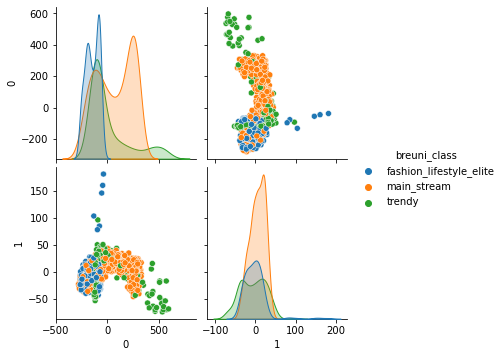

In [25]:
sns.pairplot(data=dog_df_pca2, hue='breuni_class')	
plt.show()

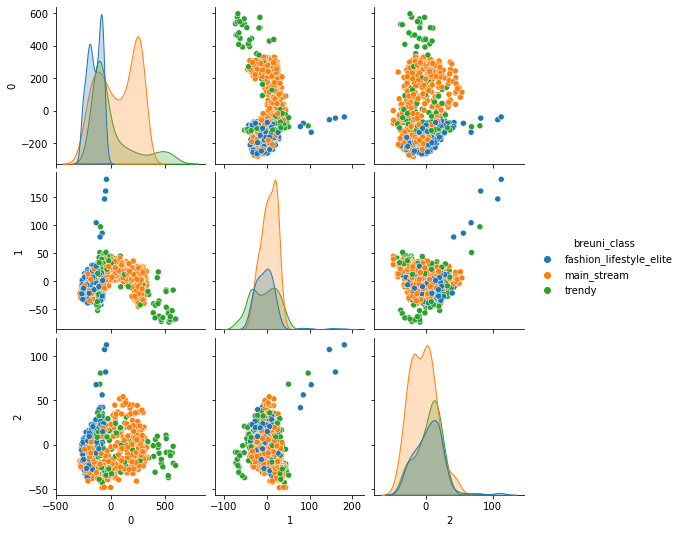

In [24]:
sns.pairplot(data=dog_df_pca, hue='breuni_class')	
plt.show()